Simple filtering of the most frequent and moset rare labels

In [1]:
import numpy as np
import matplotlib.pylab as plt
from collections import Counter
import json
import gc
%matplotlib inline

In [2]:
!head ./UP000005640.goByGeneC

"V1" "V2"
"A0PJZ0" "MKLFGFRSRRGQTVLGSIDHLYTGSGYRIRYSELQKIHKAAVKGDAAEMERCLARRSGDLDALDKQHRTALHLACASGHVKVVTLLVNRKCQIDIYDKENRTPLIQAVHCQEEACAVILLEHGANPNLKDIYGNTALHYAVYSESTSLAEKLLFHGENIEALDKV" ""
"P30461" "MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRFITVGYVDDTQFVRFDSDATSPRMAPRAPWIEQEGPEYWDRETQISKTNTQTYRENLRTALRYYNQSEAGSHTWQTMYGCDLGPDGRLLRGHNQLAYDGKDYIALNEDLSSWTAADTAAQITQLKWEAARVAEQLRAYLEGECVEWLRRYLENGKETLQRADPPKTHVTHHPISDHEATLRCWALGFYPAEITLTWQRDGEDQTQDTELVETRPAGDRTFQKWAAVVVPSGEEQRYTCHVQHEGLPKPLTLRWEPSSQSTVPIVGIVAGLAVLAVVVIGAVVAAVMCRRKSSGGKGGSYSQAACSDSAQGSDVSLTA" ""
"P18825" "MASPALAAALAVAAAAGPNASGAGERGSGGVANASGASWGPPRGQYSAGAVAGLAAVVGFLIVFTVVGNVLVVIAVLTSRALRAPQNLFLVSLASADILVATLVMPFSLANELMAYWYFGQVWCGVYLALDVLFCTSSIVHLCAISLDRYWSVTQAVEYNLKRTPRRVKATIVAVWLISAVISFPPLVSLYRQPDGAAYPQCGLNDETWYILSSCIGSFFAPCLIMGLVYARIYRVAKLRTRTLSEKRAPVGPDGASPTTENGLGAAAGAGENGHCAPPPADVEPDESSAAAERRRRRGALRRGGRRRAGAEGGAGGADGQGAGPGAAESGALTASRSPGPGGRLSRASSRSVEFFLSRRRRARSSVCRRKVAQAREKRFTFVLAVVMGVFVLCWFPFFFSYSLYGICREACQVPGPLFKFFF

In [3]:
X = [] # sequence strings
Y = [] # list of labels for each sequence

with open('./UP000005640.goByGeneC') as inp:
    inp.readline() # header
    for line in inp:
        tokens = list(map(lambda x: x.strip('"'), line.split(' ',2)))
        X.append(tokens[1])
        Y.append([t.strip().strip('"') for t in tokens[2].split(',') if len(t.strip())>0])
        

In [3]:
all_y_list = []
for ys in Y:
    all_y_list.extend(ys)

In [4]:
counter = Counter(all_y_list)

(0, 20)

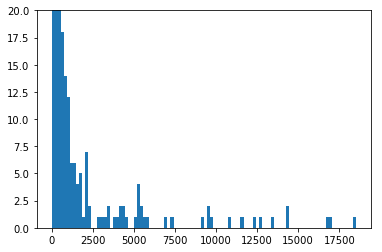

In [5]:
plt.hist(counter.values(), bins=100)
plt.ylim((0,20))

(0, 2500)

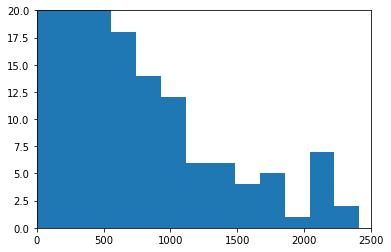

In [23]:
plt.hist(counter.values(), bins=100)
plt.ylim((0,20))
plt.xlim(0,2500)

In [24]:
good_labels = set()
for y in all_y_list:
    if counter[y]>100 and counter[y]<=7500:
        good_labels.add(y)

In [25]:
len(good_labels), len(set(all_y_list))

(296, 2027)

In [27]:
with open('good_labels', 'w') as out:
    for line in good_labels:
        out.write(line+'\n')